In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

df = df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

df['Geo_encoded'] = np.where(
    df['Geography'] == 'France', 3,
    np.where(df['Geography'] == 'Germany', 2, 1)
)
# df = pd.get_dummies(data=df, columns=['Geography'])

df['Gender'] = (df['Gender'] == 'Male').astype(int)

df = df.drop(columns=['Geography'],axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_encoded
0,619,0,42,2,0.00,1,1,1,101348.88,1,3
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,3
3,699,0,39,1,0.00,2,0,0,93826.63,0,3
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]
rf_pred = (y_proba >= 0.3).astype(int)

print("RandomForest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


xgb = XGBClassifier(
    n_estimators=350,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='logloss',
    early_stopping_rounds=50,
    random_state=42
)

xgb.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False)

xgb_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Predict Proba*****{0.3}**************")
print("Best n_estimators:", xgb.best_iteration)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Best n_estimators:", xgb.best_iteration)
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
xgb_imp = pd.Series(xgb.feature_importances_, index=X.columns)\
             .sort_values(ascending=False)

# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))
# xgb_imp.sort_values().plot(kind='barh')

# plt.title('Top Feature Importances (XGBoost)')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')

# plt.tight_layout()
# plt.show()

RandomForest Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.62      0.62      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000

[[1435  158]
 [ 154  253]]
ROC AUC: 0.861380641041658
XGBoost Accuracy: 0.8475
Predict Proba*****{0.3}**************
Best n_estimators: 168
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.62      0.67      0.64       407

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000

[[1424  169]
 [ 136  271]]
XGBoost Accuracy: 0.868
Best n_estimators: 168
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     

XGBoost Accuracy: 0.8475
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.62      0.67      0.64       407

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000



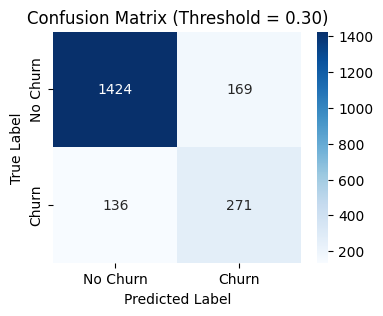

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Generate Predictions
xgb_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int)

# 2. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Print Metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. Plot the Heatmap
plt.figure(figsize=(4,3))
sn.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Threshold = 0.30)')
plt.show()


In [ ]:

for t in [0.3,0.35,0.4,0.5]:
    y_pred = (y_proba >= t).astype(int)
    print(f"Threshold: {t}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Threshold: 0.3
[[1424  169]
 [ 136  271]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.62      0.67      0.64       407

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000

Threshold: 0.35
[[1466  127]
 [ 156  251]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.66      0.62      0.64       407

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000

Threshold: 0.4
[[1493  100]
 [ 172  235]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1593
           1       0.70      0.58      0.63       407

    accuracy                           0.86      2000
 

In [ ]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geo_encoded'],
      dtype='object')

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


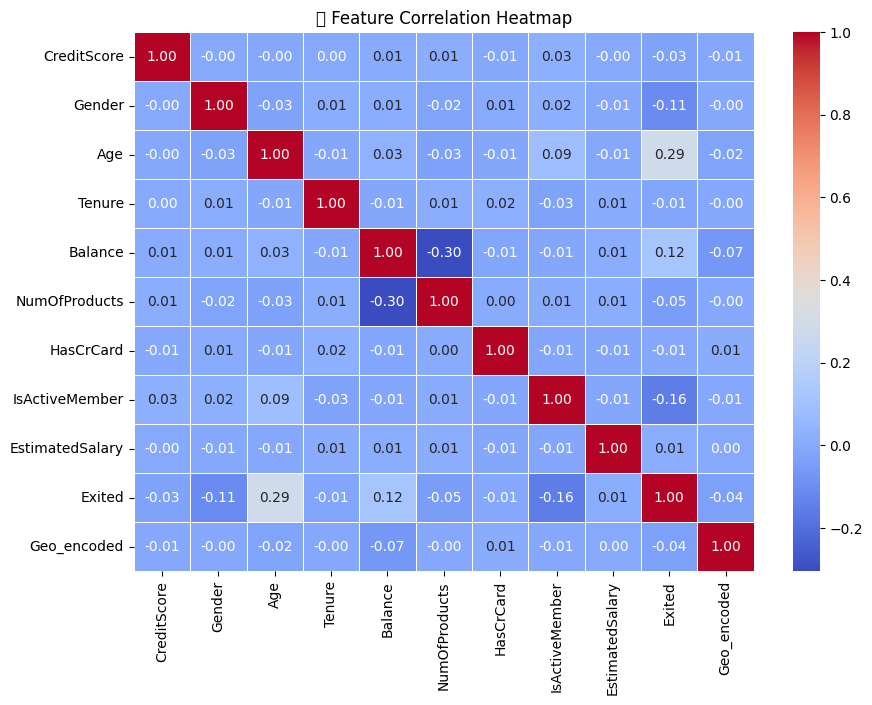

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("📊 Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
class_weight_dict


{0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

# Capture the training results in the 'history' variable
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    batch_size=32
)



Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3622 - loss: 0.6729 - precision: 0.2325 - recall: 0.9035 - val_accuracy: 0.7063 - val_loss: 0.6185 - val_precision: 0.3775 - val_recall: 0.7219
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7454 - loss: 0.5381 - precision: 0.4231 - recall: 0.7260 - val_accuracy: 0.7131 - val_loss: 0.5685 - val_precision: 0.3902 - val_recall: 0.7719
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7429 - loss: 0.5054 - precision: 0.4249 - recall: 0.7581 - val_accuracy: 0.7244 - val_loss: 0.5263 - val_precision: 0.4023 - val_recall: 0.7781
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7457 - loss: 0.5042 - precision: 0.4256 - recall: 0.7669 - val_accuracy: 0.7494 - val_loss: 0.4915 - val_precision: 0.4283 - val_recall: 0.7563
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7598 - loss: 0.4748 - precision: 0.4390 - recall: 0.7670 - val_accuracy: 0.7369 - val_loss: 0.4978 - 

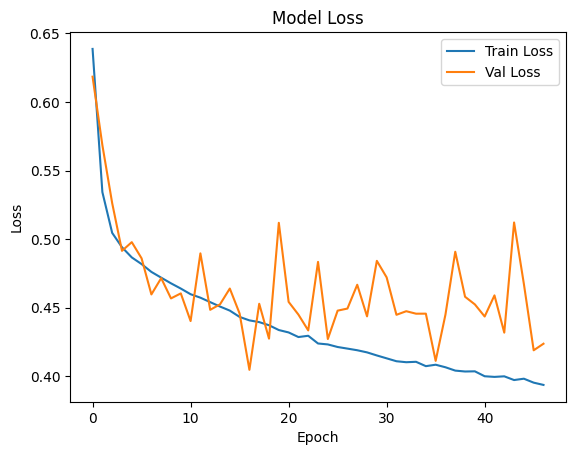

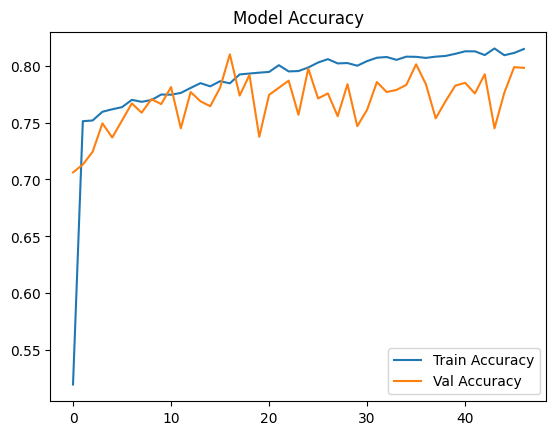

In [ ]:
import matplotlib.pyplot as plt

# Plotting Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Accuracy (if you included it in your metrics)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.show()

In [ ]:
y_proba = model.predict(X_test_scaled).ravel()
y_pred  = (y_proba >= 0.6).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1427  166]
 [ 164  243]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.59      0.60      0.60       407

    accuracy                           0.83      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.83      0.84      2000

ROC AUC: 0.8383915502559571


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Results for Threshold: 0.6 ---
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.59      0.60      0.60       407

    accuracy                           0.83      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.83      0.84      2000

ROC AUC: 0.8383915502559571


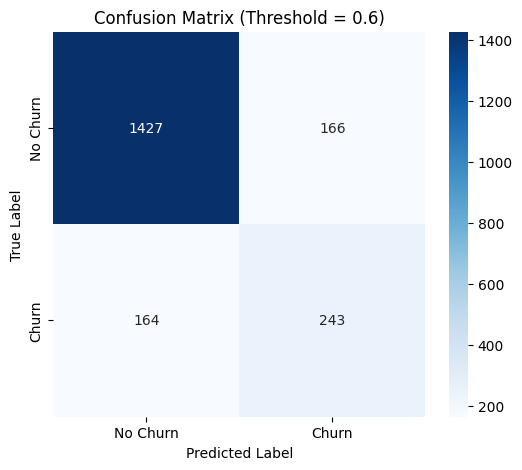

In [ ]:
# 1. Define your threshold in ONE place
threshold = 0.6

y_proba = model.predict(X_test_scaled).ravel()
y_pred  = (y_proba >= threshold).astype(int)

# 2. Use Scikit-Learn for the matrix (more consistent with your other metrics)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Print text reports
print(f"--- Results for Threshold: {threshold} ---")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# 4. Plot
plt.figure(figsize=(6, 5))
sn.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

In [ ]:
for t in [0.30,0.35,0.4,0.5,0.6]:
    y_pred = (y_proba >= t).astype(int)
    print(f"Threshold: {t}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Threshold: 0.3
[[1039  554]
 [  75  332]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1593
           1       0.37      0.82      0.51       407

    accuracy                           0.69      2000
   macro avg       0.65      0.73      0.64      2000
weighted avg       0.82      0.69      0.72      2000

Threshold: 0.35
[[1131  462]
 [  87  320]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      1593
           1       0.41      0.79      0.54       407

    accuracy                           0.73      2000
   macro avg       0.67      0.75      0.67      2000
weighted avg       0.82      0.73      0.75      2000

Threshold: 0.4
[[1196  397]
 [ 105  302]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1593
           1       0.43      0.74      0.55       407

    accuracy                           0.75      2000
 

XGBoost Accuracy: 0.8475

    [[1435  158]
    [ 154  253]]

    precision    recall  f1-score   support

    0       0.91      0.89      0.90      1593
    1       0.62      0.67      0.64       407

    accuracy                           0.85      2000
    macro avg       0.76      0.78     0.77      2000
    weighted avg    0.85      0.85     0.85      2000

ANN accuracy                           0.83

    Threshold: 0.6

    [[1427  166]
    [ 164  243]]

    precision    recall  f1-score   support

    0       0.90      0.90      0.90      1593
    1       0.59      0.60      0.60       407

    accuracy                           0.83      2000
    macro avg       0.75      0.75     0.75      2000
    weighted avg    0.84      0.83     0.84      2000